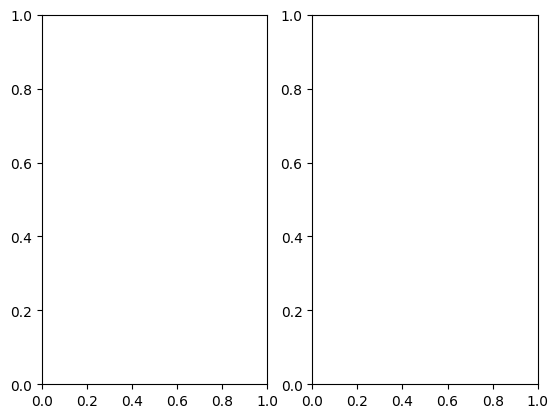

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('mountain.jpg', cv2.IMREAD_GRAYSCALE)
# image=cv2.resize(image,(400,400))
# Perform padding
height, width = image.shape
padded_height = cv2.getOptimalDFTSize(height)
padded_width = cv2.getOptimalDFTSize(width)
padded_image = np.zeros((padded_height, padded_width))
padded_image[:height, :width] = image

# Apply the Fourier transform
fourier = cv2.dft(np.float32(padded_image), flags=cv2.DFT_COMPLEX_OUTPUT)
fourier_shifted = np.fft.fftshift(fourier)

# Define the low-pass filter mask
mask = np.zeros((padded_height, padded_width), np.uint8)
center_y, center_x = padded_height // 2, padded_width // 2
radius = 50  # Adjust the radius to control the strength of the filter
cv2.circle(mask, (center_x, center_y), radius, 255, -1)

# Apply the filter mask
filtered_shifted = fourier_shifted * mask[:, :, np.newaxis]

# Shift the zero-frequency component back
filtered = np.fft.ifftshift(filtered_shifted)

# Apply the inverse Fourier transform
restored = cv2.idft(filtered)
restored = cv2.magnitude(restored[:, :, 0], restored[:, :, 1])

# Remove padding and normalize
restored = restored[:height, :width]
restored = cv2.normalize(restored, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the original and restored images
plt.subplot(1, 2, 1)
cv2.imshow('Original Image',image)
# plt.title('Original Image')
# plt.axis('off')

plt.subplot(1, 2, 2)
cv2.imshow('Restored Image',restored)
# plt.title('Restored Image')
# plt.axis('off')
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.tight_layout()
# plt.show()
